In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Extracting the dataset
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Number of training samples: ",len(train["Survived"]))
print("Number of features: ",len(train.columns))
print("Number of Survivors: ",len(train[train["Survived"]==1]))
print("Number of Non-Survivors: ",len(train[train["Survived"]==0]))

Number of training samples:  891
Number of features:  12
Number of Survivors:  342
Number of Non-Survivors:  549


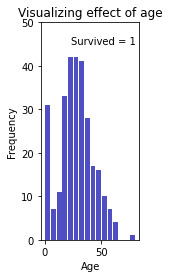

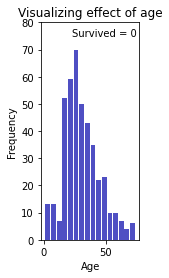

In [4]:
#Visualizing Age feature using histograms
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=train[train["Survived"]==1]["Age"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualizing effect of age')
plt.text(23, 45,"Survived = 1")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=train[train["Survived"]==0]["Age"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualizing effect of age')
plt.text(23, 75,"Survived = 0")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

train["Age"] = train["Age"].fillna(train["Age"].median())
discretizer_age = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='kmeans')
age_discretized = discretizer_age.fit_transform(train[["Age"]])
len(age_discretized)
df_age = pd.DataFrame(age_discretized,columns=['Age'])
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


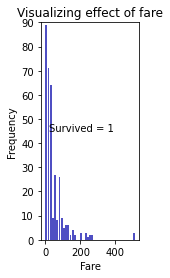

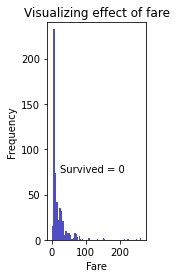

In [6]:
#Visualizing ticket fare
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=train[train["Survived"]==1]["Fare"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Visualizing effect of fare')
plt.text(23, 45,"Survived = 1")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=train[train["Survived"]==0]["Fare"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Visualizing effect of fare')
plt.text(23, 75,"Survived = 0")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

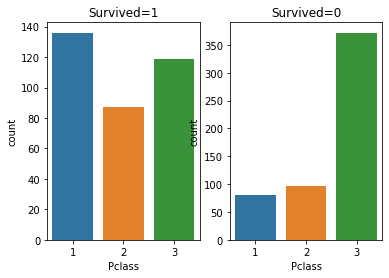

In [7]:
#Visualizing Pclass
import seaborn as sns

plt.subplot(1,2,1)
plt.title('Survived=1')
ax1 = sns.countplot(x="Pclass", data=train[train["Survived"]==1])

plt.subplot(1,2,2)
plt.title('Survived=0')
ax2 = sns.countplot(x="Pclass", data=train[train["Survived"]==0])

We can see that more people in Pclass 1 and 2 survived than people in Pclass 3. Hence Pclass can be used for classification between survivors and non-survivors.

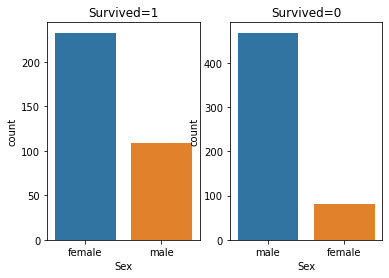

In [8]:
#Visualizing Sex feature

plt.subplot(1,2,1)
plt.title('Survived=1')
ax1 = sns.countplot(x="Sex", data=train[train["Survived"]==1])

plt.subplot(1,2,2)
plt.title('Survived=0')
ax2 = sns.countplot(x="Sex", data=train[train["Survived"]==0])

Sex is an important categorical feature because more of female survived than male.

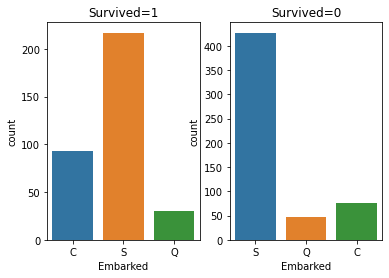

In [9]:
#Visualizing Embarked feature

plt.subplot(1,2,1)
plt.title('Survived=1')
ax1 = sns.countplot(x="Embarked", data=train[train["Survived"]==1])

plt.subplot(1,2,2)
plt.title('Survived=0')
ax2 = sns.countplot(x="Embarked", data=train[train["Survived"]==0])

Most of the passengers embarked from port S. 

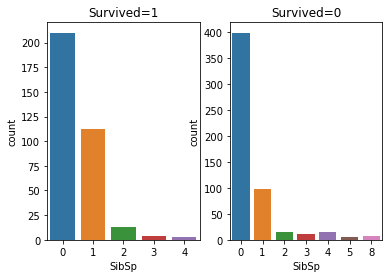

In [10]:
#Visualizing SibSp(# of siblings or spouses) and parch(# of parents or children)

plt.subplot(1,2,1)
plt.title('Survived=1')
ax1 = sns.countplot(x="SibSp", data=train[train["Survived"]==1])

plt.subplot(1,2,2)
plt.title('Survived=0')
ax2 = sns.countplot(x="SibSp", data=train[train["Survived"]==0])

We can deduce that passengers having more than 4 siblings or spouses didn't survive. 

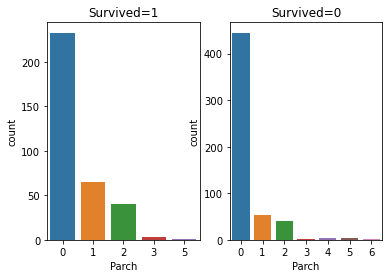

In [11]:
#Visualizing Parch(# of parents or siblings)

plt.subplot(1,2,1)
plt.title('Survived=1')
ax1 = sns.countplot(x="Parch", data=train[train["Survived"]==1])

plt.subplot(1,2,2)
plt.title('Survived=0')
ax2 = sns.countplot(x="Parch", data=train[train["Survived"]==0])

Parch and SibSp does not give much information of survival or non-survival, but we can use it to find other features like if the passenger was alone or not. 

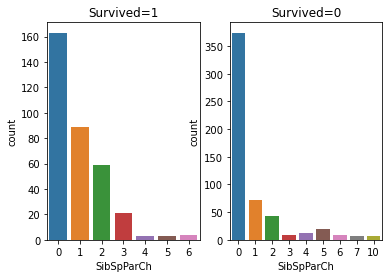

In [12]:
#Combining Parch and SibSp and analyzing

train["SibSpParCh"] = train["SibSp"] + train["Parch"]

plt.subplot(1,2,1)
plt.title('Survived=1')
ax1 = sns.countplot(x="SibSpParCh", data=train[train["Survived"]==1])

plt.subplot(1,2,2)
plt.title('Survived=0')
ax2 = sns.countplot(x="SibSpParCh", data=train[train["Survived"]==0])

In [13]:
train["Alone"] = train["SibSpParCh"] > 0

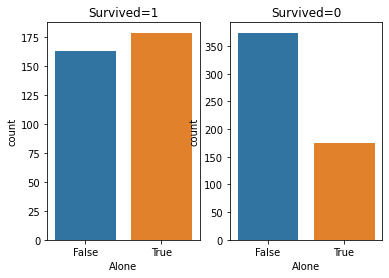

In [14]:
#Visualizing Alone feature

plt.subplot(1,2,1)
plt.title('Survived=1')
ax1 = sns.countplot(x="Alone", data=train[train["Survived"]==1])

plt.subplot(1,2,2)
plt.title('Survived=0')
ax2 = sns.countplot(x="Alone", data=train[train["Survived"]==0])

We can see that Alone passengers were more likely to survive than others.

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'the' 'Jonkheer.']
['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Other']


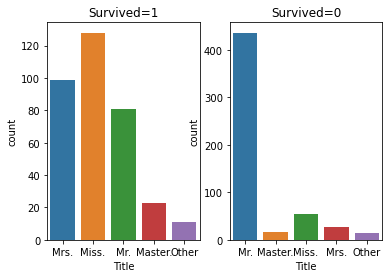

In [15]:
#Extracting title from the passenger name

title = np.zeros((len(train["Name"]),)).astype(str)
for i in range(len(train["Name"])):
    title[i] = train["Name"][i].split(',')[1].split(' ')[1]
pd_title = pd.DataFrame(title,columns=['Title'])
train = pd.concat([train,pd_title],axis=1)
print(train.Title.unique())

train["Title"].replace('Ms.','Miss.',inplace=True)
train["Title"].replace(['Don.', 'Rev.', 'Dr.', 'Mme.',  'Major.',
 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the', 'Jonkheer.'],'Other',inplace=True)
print(train.Title.unique())
train["Title"]

#Visualizing

plt.subplot(1,2,1)
plt.title('Survived=1')
ax1 = sns.countplot(x="Title", data=train[train["Survived"]==1])

plt.subplot(1,2,2)
plt.title('Survived=0')
ax2 = sns.countplot(x="Title", data=train[train["Survived"]==0])

In [16]:
#Encoding the categoircal features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ["Embarked","Sex","Alone","Title"]
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSpParCh,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1,1,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,0,2


In [17]:
features = ["Pclass","Embarked","Sex","Alone","Fare","Title"]
X_train = train[features]
X_train = pd.concat([X_train,df_age],axis=1)
Y_train = train["Survived"]
X_train.info()
X_train
#np.any(np.isnan(X_train["Age"]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Embarked  891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Alone     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Title     891 non-null    int64  
 6   Age       891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


,Pclass,Embarked,Sex,Alone,Fare,Title,Age
0,3,2,1,1,7.2500,2,1.0
1,1,0,0,1,71.2833,3,3.0
2,3,2,0,0,7.9250,1,2.0
3,1,2,0,1,53.1000,3,3.0
4,3,2,1,0,8.0500,2,3.0
...,...,...,...,...,...,...,...
886,2,2,1,0,13.0000,4,2.0
887,1,2,0,0,30.0000,1,1.0
888,3,2,0,1,23.4500,1,2.0
889,1,0,1,0,30.0000,2,2.0


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

svm = SVC(C=1,kernel='rbf')
gb = GradientBoostingClassifier(loss='exponential')
lr = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)
result = cross_validate(gb,X_train_scaled,Y_train,scoring = ('accuracy','f1'), cv = 3, return_train_score=True)

print("Train Accuracy Score: ",result["train_accuracy"].mean())
print("Test Accuracy Score: ",result["test_accuracy"].mean())
print("Train F1 Score: ",result["train_f1"].mean())
print("Test F1 Score: ",result["test_f1"].mean())

Train Accuracy Score:  0.8989898989898991
Test Accuracy Score:  0.8271604938271606
Train F1 Score:  0.8627107574976384
Test F1 Score:  0.763077899687651


In [19]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
test["SibSpParCh"] = test["SibSp"] + test["Parch"]
test["Alone"] = test["SibSpParCh"] > 0

In [21]:
title = np.zeros((len(test["Name"]),)).astype(str)
for i in range(len(test["Name"])):
    title[i] = test["Name"][i].split(',')[1].split(' ')[1]
pd_title = pd.DataFrame(title,columns=['Title'])
test = pd.concat([test,pd_title],axis=1)
print(test.Title.unique())

test["Title"].replace('Ms.','Miss.',inplace=True)
test["Title"].replace(['Col.' ,'Rev.', 'Dr.', 'Dona.'],'Other',inplace=True)
print(test.Title.unique())
test["Title"]

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Ms.' 'Col.' 'Rev.' 'Dr.' 'Dona.']
['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Other']


0          Mr.
1         Mrs.
2          Mr.
3          Mr.
4         Mrs.
        ...   
413        Mr.
414      Other
415        Mr.
416        Mr.
417    Master.
Name: Title, Length: 418, dtype: object

In [22]:
test[categorical_cols] = test[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
test.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSpParCh,Alone,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,0,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,1,1,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,0,0,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,0,0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,2,1,3
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,2,0,0,2
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,1,0,0,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,2,2,1,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,0,0,0,3
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,2,2,1,2


In [23]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
X_test = test[features]
age_discretized = discretizer_age.transform(test[["Age"]])
len(age_discretized)
df_age = pd.DataFrame(age_discretized,columns=['Age'])
X_test = pd.concat([X_test,df_age],axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Embarked  418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Alone     418 non-null    int64  
 4   Fare      418 non-null    float64
 5   Title     418 non-null    int64  
 6   Age       418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [24]:
X_test_scaled = ss.transform(X_test)
model = SVC(C=1.0,kernel='rbf').fit(X_train_scaled,Y_train)
Y_predict = model.predict(X_test_scaled)

In [25]:
submission_df = pd.DataFrame({'PassengerId' : test["PassengerId"],'Survived' : Y_predict})
submission = submission_df.to_csv('submission.csv',index=False)